In [1]:
import json
current_season = 2000
end_season = 2017

all_data = []

#amalgamate the data
while current_season <= end_season: 
    filename = 'Raw_Data/' + str(current_season) + '-' + str(current_season + 1) + '.json'
    print(filename)
    with open(filename) as data_file:    
        data = json.load(data_file)
        all_data.append(data)
    
    current_season += 1

Raw_Data/2000-2001.json
Raw_Data/2001-2002.json
Raw_Data/2002-2003.json
Raw_Data/2003-2004.json
Raw_Data/2004-2005.json
Raw_Data/2005-2006.json
Raw_Data/2006-2007.json
Raw_Data/2007-2008.json
Raw_Data/2008-2009.json
Raw_Data/2009-2010.json
Raw_Data/2010-2011.json
Raw_Data/2011-2012.json
Raw_Data/2012-2013.json
Raw_Data/2013-2014.json
Raw_Data/2014-2015.json
Raw_Data/2015-2016.json
Raw_Data/2016-2017.json
Raw_Data/2017-2018.json


In [2]:
len(all_data)

18

In [3]:
#get the teams for each season
season_teams_sets = []
for season in all_data:
    set_of_teams = set()
    for game in season:
        teams_and_data = game["teams_and_data"]
        at = teams_and_data.index(" at ")
        pbp = teams_and_data.index("Play-By-Play")
        home_team = teams_and_data[at+4: pbp].rstrip()
        away_team = teams_and_data[0:at].rstrip()
        set_of_teams.add(home_team)
        set_of_teams.add(away_team)
    season_teams_sets.append(set_of_teams)   

In [31]:
#keep track  of teams that aren't consistent across all seasons
inconsistent_teams_and_seasons_across_all_seasons = set()

consistent_just_teams = set()
current_season = 2000
for season_teams in season_teams_sets:
    for team in season_teams:
        if (team not in consistent_just_teams):
            in_all_other_seasons = True
            for season_teams_checker in season_teams_sets:
                if team not in season_teams_checker:
                    in_all_other_seasons = False
                    break
            if in_all_other_seasons:
                consistent_just_teams.add(team)
            else: inconsistent_teams_and_seasons_across_all_seasons.add((team , str(current_season) + '-' + str(current_season + 1)))
    current_season += 1
    
consistent_just_teams #team names that stay the same
inconsistent_teams_and_seasons_across_all_seasons #team names that aren't persistent throughout all seasons

{('Brooklyn Nets', '2012-2013'),
 ('Brooklyn Nets', '2013-2014'),
 ('Brooklyn Nets', '2014-2015'),
 ('Brooklyn Nets', '2015-2016'),
 ('Brooklyn Nets', '2016-2017'),
 ('Brooklyn Nets', '2017-2018'),
 ('Charlotte Bobcats', '2004-2005'),
 ('Charlotte Bobcats', '2005-2006'),
 ('Charlotte Bobcats', '2006-2007'),
 ('Charlotte Bobcats', '2007-2008'),
 ('Charlotte Bobcats', '2008-2009'),
 ('Charlotte Bobcats', '2009-2010'),
 ('Charlotte Bobcats', '2010-2011'),
 ('Charlotte Bobcats', '2011-2012'),
 ('Charlotte Bobcats', '2012-2013'),
 ('Charlotte Bobcats', '2013-2014'),
 ('Charlotte Hornets', '2000-2001'),
 ('Charlotte Hornets', '2001-2002'),
 ('Charlotte Hornets', '2014-2015'),
 ('Charlotte Hornets', '2015-2016'),
 ('Charlotte Hornets', '2016-2017'),
 ('Charlotte Hornets', '2017-2018'),
 ('Memphis Grizzlies', '2001-2002'),
 ('Memphis Grizzlies', '2002-2003'),
 ('Memphis Grizzlies', '2003-2004'),
 ('Memphis Grizzlies', '2004-2005'),
 ('Memphis Grizzlies', '2005-2006'),
 ('Memphis Grizzlies', '2

In [8]:
min_num_plays = 1000000000
max_num_plays = 0

import matplotlib.pyplot as plt
import numpy as np


all_games_num_plays = []

extreme_games = []

count_above = 0
count_below = 0
for season in all_data:
    for game in season:
        num_plays = len(game["plays"])
        all_games_num_plays.append(num_plays)
        if num_plays < min_num_plays:
            min_num_plays = num_plays
        elif num_plays > max_num_plays:
            max_num_plays = num_plays
        
        if num_plays > 600:
            count_above +=1
        if num_plays < 360:
            count_below +=1
            
        if num_plays >= 625:
            extreme_games.append(">=625 plays " + game["teams_and_data"] + " " + game["plays"][len(game["plays"]) - 1]["score"])
        if num_plays <= 360:
            extreme_games.append("<=360 plays " + game["teams_and_data"] + " " + game["plays"][len(game["plays"]) - 1]["score"])
        

print("Mean", np.mean(all_games_num_plays))
print("SD", np.std(all_games_num_plays))
print("Min:", min_num_plays)
print("Max:", max_num_plays)
print("Number of games with > 600 plays:", count_above)
print("Number of games with < 360 plays:", count_below)

extreme_games.sort()
extreme_games

Mean 446.31728325939963
SD 33.39426004954058
Min: 339
Max: 694
Number of games with > 600 plays: 28
Number of games with < 360 plays: 12


['<=360 plays Atlanta Hawks at Detroit Pistons Play-By-Play, February 14, 2011 94-79',
 '<=360 plays Boston Celtics at Detroit Pistons Play-By-Play, February 6, 2007 102-109',
 '<=360 plays Brooklyn Nets at Miami Heat Play-By-Play, April 8, 2014 88-87',
 '<=360 plays Charlotte Bobcats at Cleveland Cavaliers Play-By-Play, January 3, 2010 91-88',
 '<=360 plays Charlotte Hornets at Toronto Raptors Play-By-Play, April 15, 2015 87-92',
 '<=360 plays Chicago Bulls at Atlanta Hawks Play-By-Play, December 22, 2012 75-92',
 '<=360 plays Dallas Mavericks at Miami Heat Play-By-Play, December 22, 2017 101-113',
 '<=360 plays Indiana Pacers at Los Angeles Clippers Play-By-Play, December 1, 2004 76-88',
 '<=360 plays Los Angeles Lakers at Dallas Mavericks Play-By-Play, January 19, 2011 100-109',
 '<=360 plays Miami Heat at New Orleans Hornets Play-By-Play, January 11, 2008 88-114',
 '<=360 plays Miami Heat at Philadelphia 76ers Play-By-Play, December 17, 2003 76-87',
 '<=360 plays New York Knicks at

/Users/paul2/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')


(0.0, 960.0)

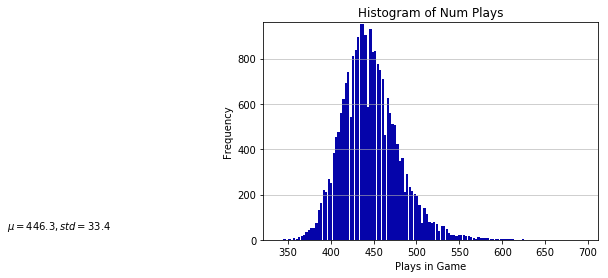

In [9]:
#histogram

n, bins, patches = plt.hist(x=all_games_num_plays, bins='auto', color='#0504aa',
                            alpha=1, rwidth=0.90)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Plays in Game')
plt.ylabel('Frequency')
plt.title('Histogram of Num Plays')
plt.text(23, 45, r'$\mu=446.3, std=33.4$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [27]:
for i in range(len(all_data)):
    print("Total number of games in ", str(2000 + i) + "-" + str(2001 + i), " season: ", str(len(all_data[i])) )

Total number of games in  2000-2001  season:  1260
Total number of games in  2001-2002  season:  1260
Total number of games in  2002-2003  season:  1277
Total number of games in  2003-2004  season:  1271
Total number of games in  2004-2005  season:  1314
Total number of games in  2005-2006  season:  1319
Total number of games in  2006-2007  season:  1309
Total number of games in  2007-2008  season:  1316
Total number of games in  2008-2009  season:  1315
Total number of games in  2009-2010  season:  1312
Total number of games in  2010-2011  season:  1311
Total number of games in  2011-2012  season:  1074
Total number of games in  2012-2013  season:  1314
Total number of games in  2013-2014  season:  1319
Total number of games in  2014-2015  season:  1311
Total number of games in  2015-2016  season:  1316
Total number of games in  2016-2017  season:  1309
Total number of games in  2017-2018  season:  1312
